In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


In [2]:
# Read in grounding line

dfGL = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/GroundingLine.csv")

points = np.column_stack((list(dfGL["Points:0"])[::10], list(dfGL["Points:1"])[::10]))

alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

hull_pts = hull_pts

for i in range(len(hull_pts[0])):
    hull_pts[0][i] = hull_pts[0][i]/1000
    hull_pts[1][i] = hull_pts[1][i]/1000


/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


In [3]:
# Read in data

Sims = ['n3_50', 'n3_95', 'n3_99', 'n4_50', 'n4_95', 'n4_99']

SimDataSets = {}

for i in Sims:
    SimDataSets[i] = pd.read_csv('../Simulations/DerwaelSimulations/ThicknessContoursForAge/' + str(i) + '.csv', delimiter=',')


In [4]:
# Remove the upper contour in each dataset

for i in Sims:
    SimDataSets[i] = SimDataSets[i][SimDataSets[i]['depth'] > 10.0]


In [5]:
# Define a regular grid 

xmin, xmax = min(SimDataSets['n3_50']['Points:0']), max(SimDataSets['n3_50']['Points:0'])
ymin, ymax = min(SimDataSets['n3_50']['Points:1']), max(SimDataSets['n3_50']['Points:1'])
dist = 100
nx, ny = int((xmax - xmin)/dist + 1), int((ymax - ymin)/dist + 1)
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
grid_x, grid_y = np.meshgrid(x, y)


In [21]:
# Regrid the data onto the regular grid

AgeRegridded = {}

for i in Sims:
    AgeRegridded[i] = scipy.interpolate.griddata((SimDataSets[i]["Points:0"], SimDataSets[i]["Points:1"]), SimDataSets[i]["age"], (grid_x, grid_y), method='linear')


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9640/3830635466.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0, 500, 1000, 1500, 2000])


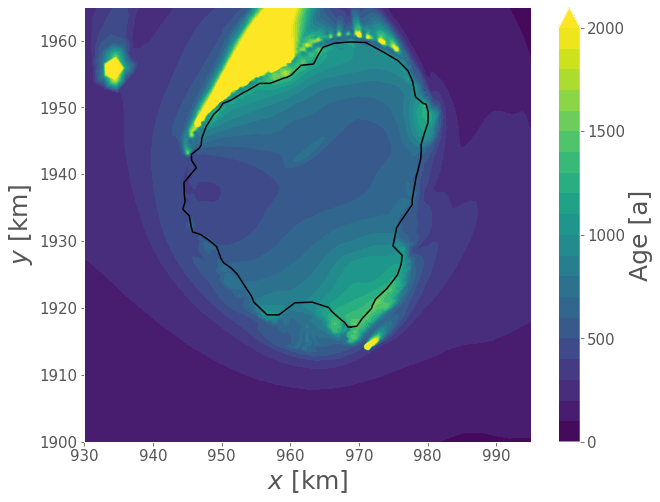

In [22]:
# Plot the age field for n3_50

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000,  AgeRegridded[Sims[0]], levels=np.linspace(0,2000,21),  cmap="viridis", extend = 'max')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0, 500, 1000, 1500, 2000])
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Age [a]", rotation=90, size=25)

fig.savefig('../Figures/n3_50.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9640/1171378308.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[6000, 7000, 8000, 9000])


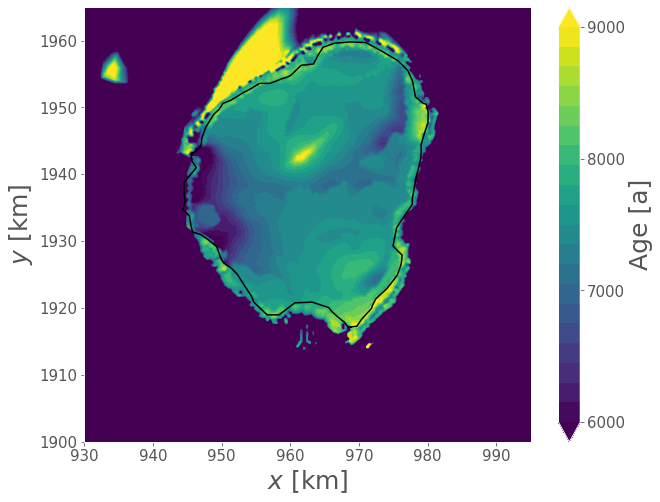

In [23]:
# Plot the age field for n3_95

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000,  AgeRegridded[Sims[1]], levels=np.linspace(6000,9000,21),  cmap="viridis", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[6000, 7000, 8000, 9000])
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Age [a]", rotation=90, size=25)

fig.savefig('../Figures/n3_95.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9640/1180895184.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[6000, 7000, 8000, 9000, 10000])


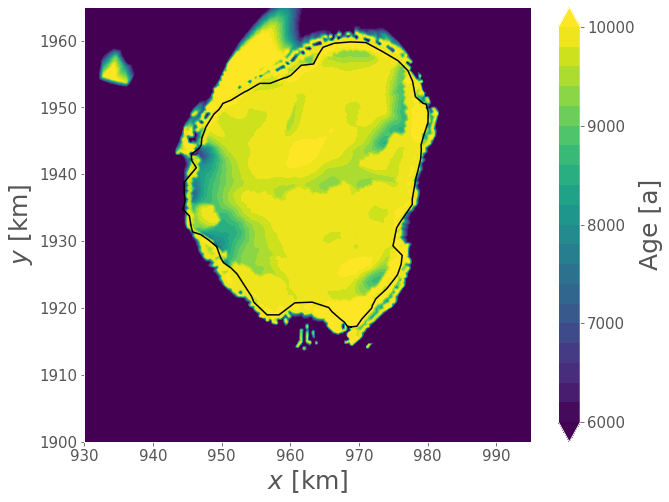

In [24]:
# Plot the age field for n3_99

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000,  AgeRegridded[Sims[2]], levels=np.linspace(6000,10000,21),  cmap="viridis", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[6000, 7000, 8000, 9000, 10000])
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Age [a]", rotation=90, size=25)

fig.savefig('../Figures/n3_99.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9640/1514314810.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0, 500, 1000, 1500, 2000])


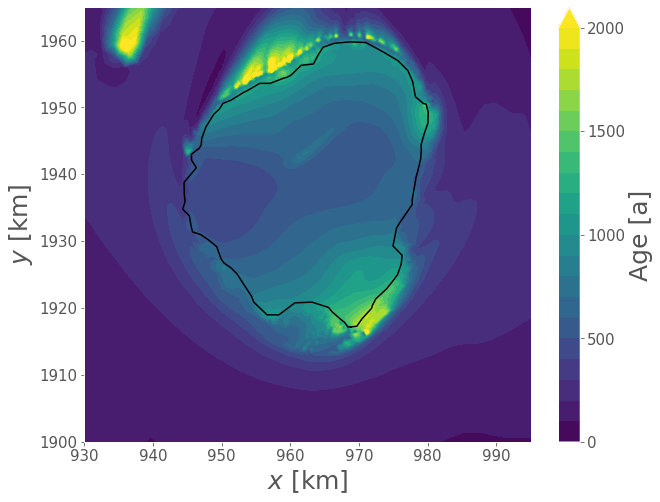

In [25]:
# Plot the age field for n4_50

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000,  AgeRegridded[Sims[3]], levels=np.linspace(0,2000,21),  cmap="viridis", extend = 'max')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0, 500, 1000, 1500, 2000])
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Age [a]", rotation=90, size=25)

fig.savefig('../Figures/n4_50.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9640/392133606.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[6000, 7000, 8000, 9000])


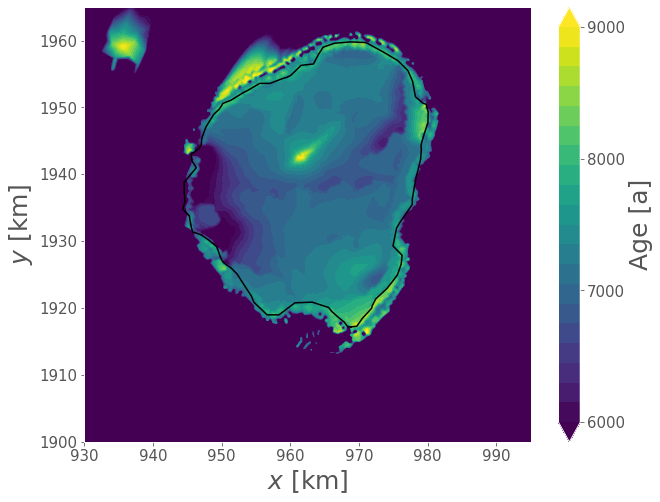

In [26]:
# Plot the age field for n4_95

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000,  AgeRegridded[Sims[4]], levels=np.linspace(6000,9000,21),  cmap="viridis", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[6000, 7000, 8000, 9000])
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Age [a]", rotation=90, size=25)

fig.savefig('../Figures/n4_95.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9640/642526633.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[6000, 7000, 8000, 9000, 10000])


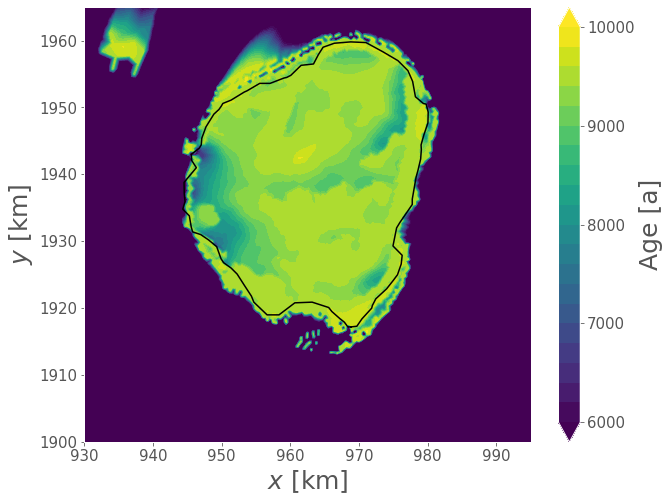

In [27]:
# Plot the age field for n4_99

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000,  AgeRegridded[Sims[5]], levels=np.linspace(6000,10000,21),  cmap="viridis", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[6000, 7000, 8000, 9000, 10000])
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Age [a]", rotation=90, size=25)

fig.savefig('../Figures/n4_99.jpg', format='jpg', dpi=700, bbox_inches = "tight")

In [28]:
# Substract the fields

Diff50 = AgeRegridded[Sims[3]] - AgeRegridded[Sims[0]]
Diff95 = AgeRegridded[Sims[4]] - AgeRegridded[Sims[1]]
Diff99 = AgeRegridded[Sims[5]] - AgeRegridded[Sims[2]]



/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9640/2746880682.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-50, -25, 0, 25, 50])


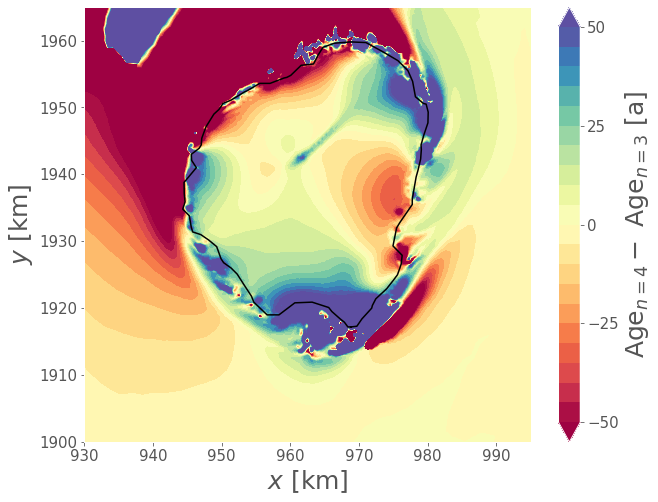

In [29]:
# Plot the difference between n=3 and n=4 for the 50 percent thickness

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000,  Diff50, levels=np.linspace(-50,50,21),  cmap="Spectral", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-50, -25, 0, 25, 50])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"Age$_{n=4}-$ Age$_{n=3}$ [a]", rotation=90, size=25)

fig.savefig('../Figures/AgeDiff50.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9640/1613672121.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-500, -250, 0, 250, 500])


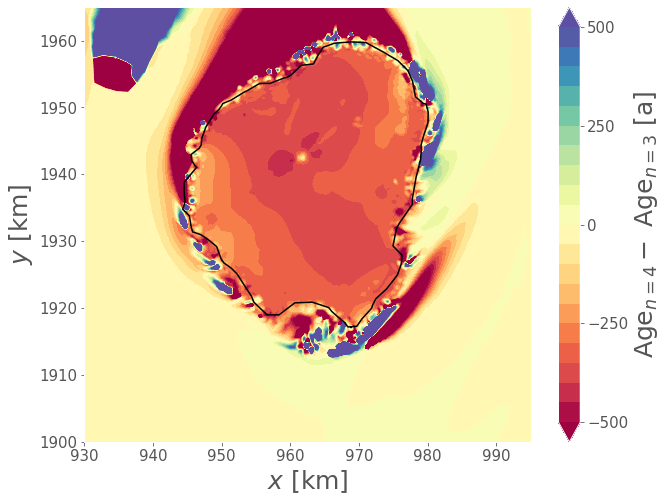

In [30]:
# Plot the difference between n=3 and n=4 for the 95 percent thickness

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000,  Diff95, levels=np.linspace(-500,500,21),  cmap="Spectral", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
#cbar = fig.colorbar(CS, ticks=[-500, -250, 0, 250, 500])

cbar = fig.colorbar(CS, ticks=[-500, -250, 0, 250, 500])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"Age$_{n=4} -$ Age$_{n=3}$ [a]", rotation=90, size=25)

fig.savefig('../Figures/AgeDiff95.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9640/1458876835.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-1000, -500,  0, 500, 1000])


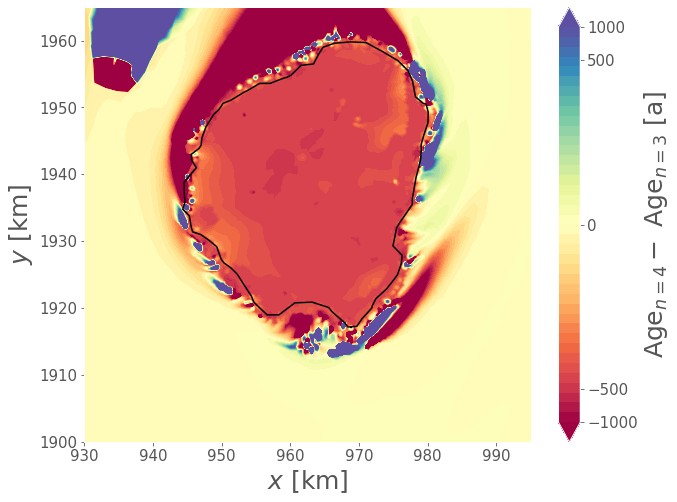

In [31]:
# Plot the difference between n=3 and n=4 for the 99 percent thickness

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000,  Diff99, levels=np.linspace(-600,600,41),  cmap="Spectral", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
#cbar = fig.colorbar(CS, ticks=[-500, -250, 0, 250, 500])

cbar = fig.colorbar(CS, ticks=[-1000, -500,  0, 500, 1000])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"Age$_{n=4} -$ Age$_{n=3}$ [a]", rotation=90, size=25)

fig.savefig('../Figures/AgeDiff99.jpg', format='jpg', dpi=700, bbox_inches = "tight")

In [32]:
# Cut away the floating ice

Diff50_copy = Diff50
Diff95_copy = Diff95
Diff99_copy = Diff99

PercDiff95 = 200 * (AgeRegridded[Sims[4]] - AgeRegridded[Sims[1]]) / (AgeRegridded[Sims[4]] + AgeRegridded[Sims[1]])
PercDiff95_copy = PercDiff95
PercDiff99 = 200 * (AgeRegridded[Sims[5]] - AgeRegridded[Sims[2]]) / (AgeRegridded[Sims[5]] + AgeRegridded[Sims[2]])
PercDiff99_copy = PercDiff99

poly = Polygon(zip(list(hull_pts[0]), list(hull_pts[1])))

for i in range(len(x)):
    for j in range(len(y)):
        boolean = poly.contains(Point(x[i]/1000, y[j]/1000))
        if boolean == False:
            Diff50_copy[j][i] = 'nan'
            Diff95_copy[j][i] = 'nan'
            Diff99_copy[j][i] = 'nan'
            PercDiff95_copy[j][i] = 'nan'
            PercDiff99_copy[j][i] = 'nan'


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9640/5679364.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-500, -250, 0, 250, 500])


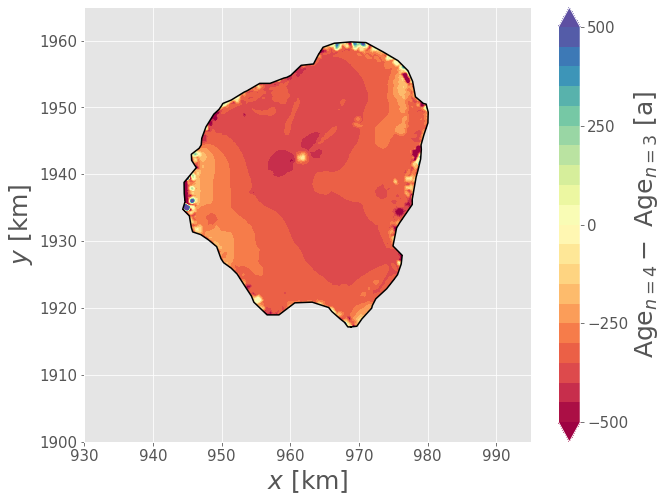

In [33]:
# Plot the difference between n=3 and n=4 for the 95 percent thickness

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000,  Diff95_copy, levels=np.linspace(-500,500,21),  cmap="Spectral", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-500, -250, 0, 250, 500])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"Age$_{n=4} -$ Age$_{n=3}$ [a]", rotation=90, size=25)


In [34]:
# Calculate the average 

np.nanmean(Diff50_copy), np.nanmean(Diff95_copy), np.nanmean(Diff99_copy), np.nanmean(PercDiff95_copy), np.nanmean(PercDiff99_copy)


(7.1550634229586985,
 -335.39246823636614,
 -456.77705687569625,
 -4.643163674071665,
 -4.831949700843876)